In this example, we cluster our alanine dipeptide trajectory using the [RMSD distance metric](http://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions) and [Ward's method](http://en.wikipedia.org/wiki/Ward's_method).

In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy

Let's load up our trajectory. This is the trajectory that we generated in the "Running a simulation in OpenMM and analyzing the results with mdtraj" example. The first step is to build the rmsd cache, which precalculates some values for the RMSD computation.

In [2]:
traj = md.load('material/md.pdb')

Lets compute all pairwise rmsds between conformations.

In [3]:
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print('Max pairwise rmsd: %f nm' % np.max(distances))

Max pairwise rmsd: 2.703364 nm


`scipy.cluster` implements the ward linkage algorithm (among others)

In [4]:
linkage = scipy.cluster.hierarchy.ward(distances)

Lets plot the resulting dendrogram.

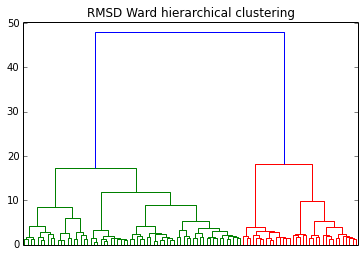

In [5]:
plt.title('RMSD Ward hierarchical clustering')
scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')
None